In [1]:
import pandas as pd

# Load your CSV file
df = pd.read_csv(r"C:\Users\Coope\DHT22_data.csv")

# Inspect the data
print(df.head())
print(df.describe())


        Timestamp  Temperature  Humidity
0  20240724132817         22.3      47.0
1  20240724132847         22.3      48.1
2  20240724132917         22.3      47.1
3  20240724132947         22.2      47.3
4  20240724133017         22.1      47.1
          Timestamp  Temperature   Humidity
count  6.500000e+01    65.000000  65.000000
mean   2.024072e+13    22.383077  50.646154
std    1.158118e+03     0.538972   8.784789
min    2.024072e+13    21.800000  46.200000
25%    2.024072e+13    22.000000  47.900000
50%    2.024072e+13    22.200000  48.800000
75%    2.024072e+13    22.600000  49.200000
max    2.024072e+13    23.900000  94.500000


In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define your independent (X) and dependent (Y) variables
X = df[['Temperature']].values
y = df['Humidity'].values

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [5]:
# Find min and max temperature values
min_temp = df['Temperature'].min()
max_temp = df['Temperature'].max()

# Interpolate 100 equally distant temperature values
test_temperatures = np.linspace(min_temp, max_temp, 100).reshape(-1, 1)

# Predict humidity for these temperature values
predicted_humidity = model.predict(test_temperatures)


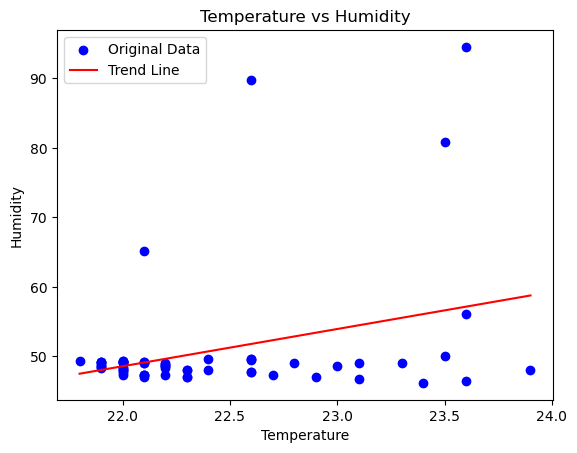

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Original Data')

# Line plot of the test data
plt.plot(test_temperatures, predicted_humidity, color='red', label='Trend Line')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.legend()
plt.show()


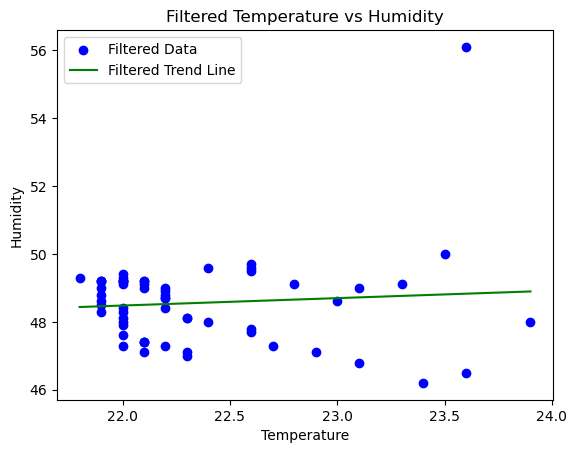

In [9]:
filtered_df = df[(df['Temperature'] <= 30) & (df['Temperature'] >= 15)]
filtered_df = df[(df['Humidity'] <= 60) & (df['Humidity'] >= 15)]


# Repeat the LR model creation with filtered data
X_filtered = filtered_df[['Temperature']].values
y_filtered = filtered_df['Humidity'].values

model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

# Generate new test temperatures and predict humidity
predicted_humidity_filtered = model_filtered.predict(test_temperatures)

# Plot again
plt.scatter(X_filtered, y_filtered, color='blue', label='Filtered Data')
plt.plot(test_temperatures, predicted_humidity_filtered, color='green', label='Filtered Trend Line')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Filtered Temperature vs Humidity')
plt.legend()
plt.show()


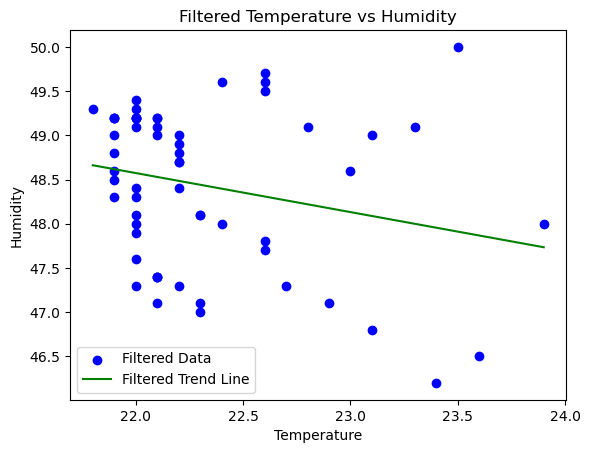

In [11]:
filtered_df = df[(df['Temperature'] <= 23.5) & (df['Temperature'] >= 15)]
filtered_df = df[(df['Humidity'] <= 55) & (df['Humidity'] >= 15)]


# Repeat the LR model creation with filtered data
X_filtered = filtered_df[['Temperature']].values
y_filtered = filtered_df['Humidity'].values

model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

# Generate new test temperatures and predict humidity
predicted_humidity_filtered = model_filtered.predict(test_temperatures)

# Plot again
plt.scatter(X_filtered, y_filtered, color='blue', label='Filtered Data')
plt.plot(test_temperatures, predicted_humidity_filtered, color='green', label='Filtered Trend Line')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Filtered Temperature vs Humidity')
plt.legend()
plt.show()
